# <font color=darkred style="font-family:Architect;">Clustering of Countries
  
### <font color=darkblue style="font-family:Architect;">by: Abhishek Hegde

![NGOImage](http://khatuwalagroup.com/wp-content/uploads/2017/01/Mittal-Charitable-trust-logo-.png)

### <font color=darkblue style="font-family: Helvetica"> HELP International is an international humanitarian NGO that is committed to fighting poverty and providing the people of backward countries with basic amenities and relief during the time of disasters and natural calamities. It runs a lot of operational projects from time to time along with advocacy drives to raise awareness as well as for funding purposes.
    
### <font color=darkblue style="font-family: Helvetica"> After the recent funding programmes, they have been able to raise around $ 10 million. Now the CEO of the NGO needs to decide how to use this money strategically and effectively. The significant issues that come while making this decision are mostly related to choosing the countries that are in the direst need of aid.  

### <font color=darkblue style="font-family: Helvetica"> And this is where we come in. Our job is to categorise the countries using socio-economic and health factors that determine the overall development of the country. Then we need to suggest the countries which the CEO needs to focus on the most. 

## <font color=darkred> Analysis Approach</font>
- ### [Data Inspection](#di): We shall first begin with inspecting the data we have, do necessary conversions and perform missing value analysis on it.
- ### [EDA](#eda): We will now proceed to do detailed visualizations from univariate to bivariate and get a feel of how each feature behaves with respect to others hence getting an idea of underlying correlations within our dataset, also, we will select out features which we shall use for cluster profiling later. We will conclude with outlier analysis and handling.
- ### [Modelling](#modelling): We will now transform our data to make it appropriate to be modelled, we will scale it, and find its Hopkin’s statistic.
- ### We will now perform [Kmeans clustering](#kmeans), the value of k will be decided by Silhouette Score and Elbow Curve analysis. We will then visualize the clusters and do cluster profiling.
- ### Next we will do [Hierarchical clustering](#hc), we will try both single linkage and complete linkage methods and see what performs better, select a number of clusters and proceed with visualization and profiling.
- ### With the Final 2 lists, we fill do [final analysis](#fa) based on several factors and come up with the final list of countries to be submitted to the NGO.


## <font color=darkred> Importing libraries</font>

In [1]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

<a id='di'></a>
## <font color=darkred> Importing & Inspecting Data</font>


In [2]:
country_df= pd.read_csv('Country-data.csv')
country_df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [3]:
country_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


##### <font color=darkblue> - We have data on 167 countries

### <font color=darkred>Checking missing values</font>

In [4]:
print(country_df.isnull().sum())

country       0
child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64


##### <font color=darkblue> - No Missing Values.

In [5]:
# Data dictionary
pd.set_option('display.max_colwidth', -1) 

data_dict = pd.read_csv('data-dictionary+.csv')
data_dict

,Column Name,Description
0,country,Name of the country
1,child_mort,Death of children under 5 years of age per 1000 live births
2,exports,Exports of goods and services per capita. Given as %age of the GDP per capita
3,health,Total health spending per capita. Given as %age of GDP per capita
4,imports,Imports of goods and services per capita. Given as %age of the GDP per capita
5,Income,Net income per person
6,Inflation,The measurement of the annual growth rate of the Total GDP
7,life_expec,The average number of years a new born child would live if the current mortality patterns are to remain the same
8,total_fer,The number of children that would be born to each woman if the current age-fertility rates remain the same.
9,gdpp,The GDP per capita. Calculated as the Total GDP divided by the total population.


##### <font color=darkblue> - We can see most of the values are given as a % of GDP per capita, converting them into actuals is better for analysis.

In [6]:
# Converting exports,imports and health spending percentages to absolute values.

country_df['exports'] =country_df['exports'] * country_df['gdpp']/100
country_df['imports'] = country_df['imports'] * country_df['gdpp']/100
country_df['health'] = country_df['health'] * country_df['gdpp']/100

<a id='eda'></a>
## <font color=darkred>EDA

- ##### <font color=darkblue> Let's start with a Paiplot of all the numeric variables!

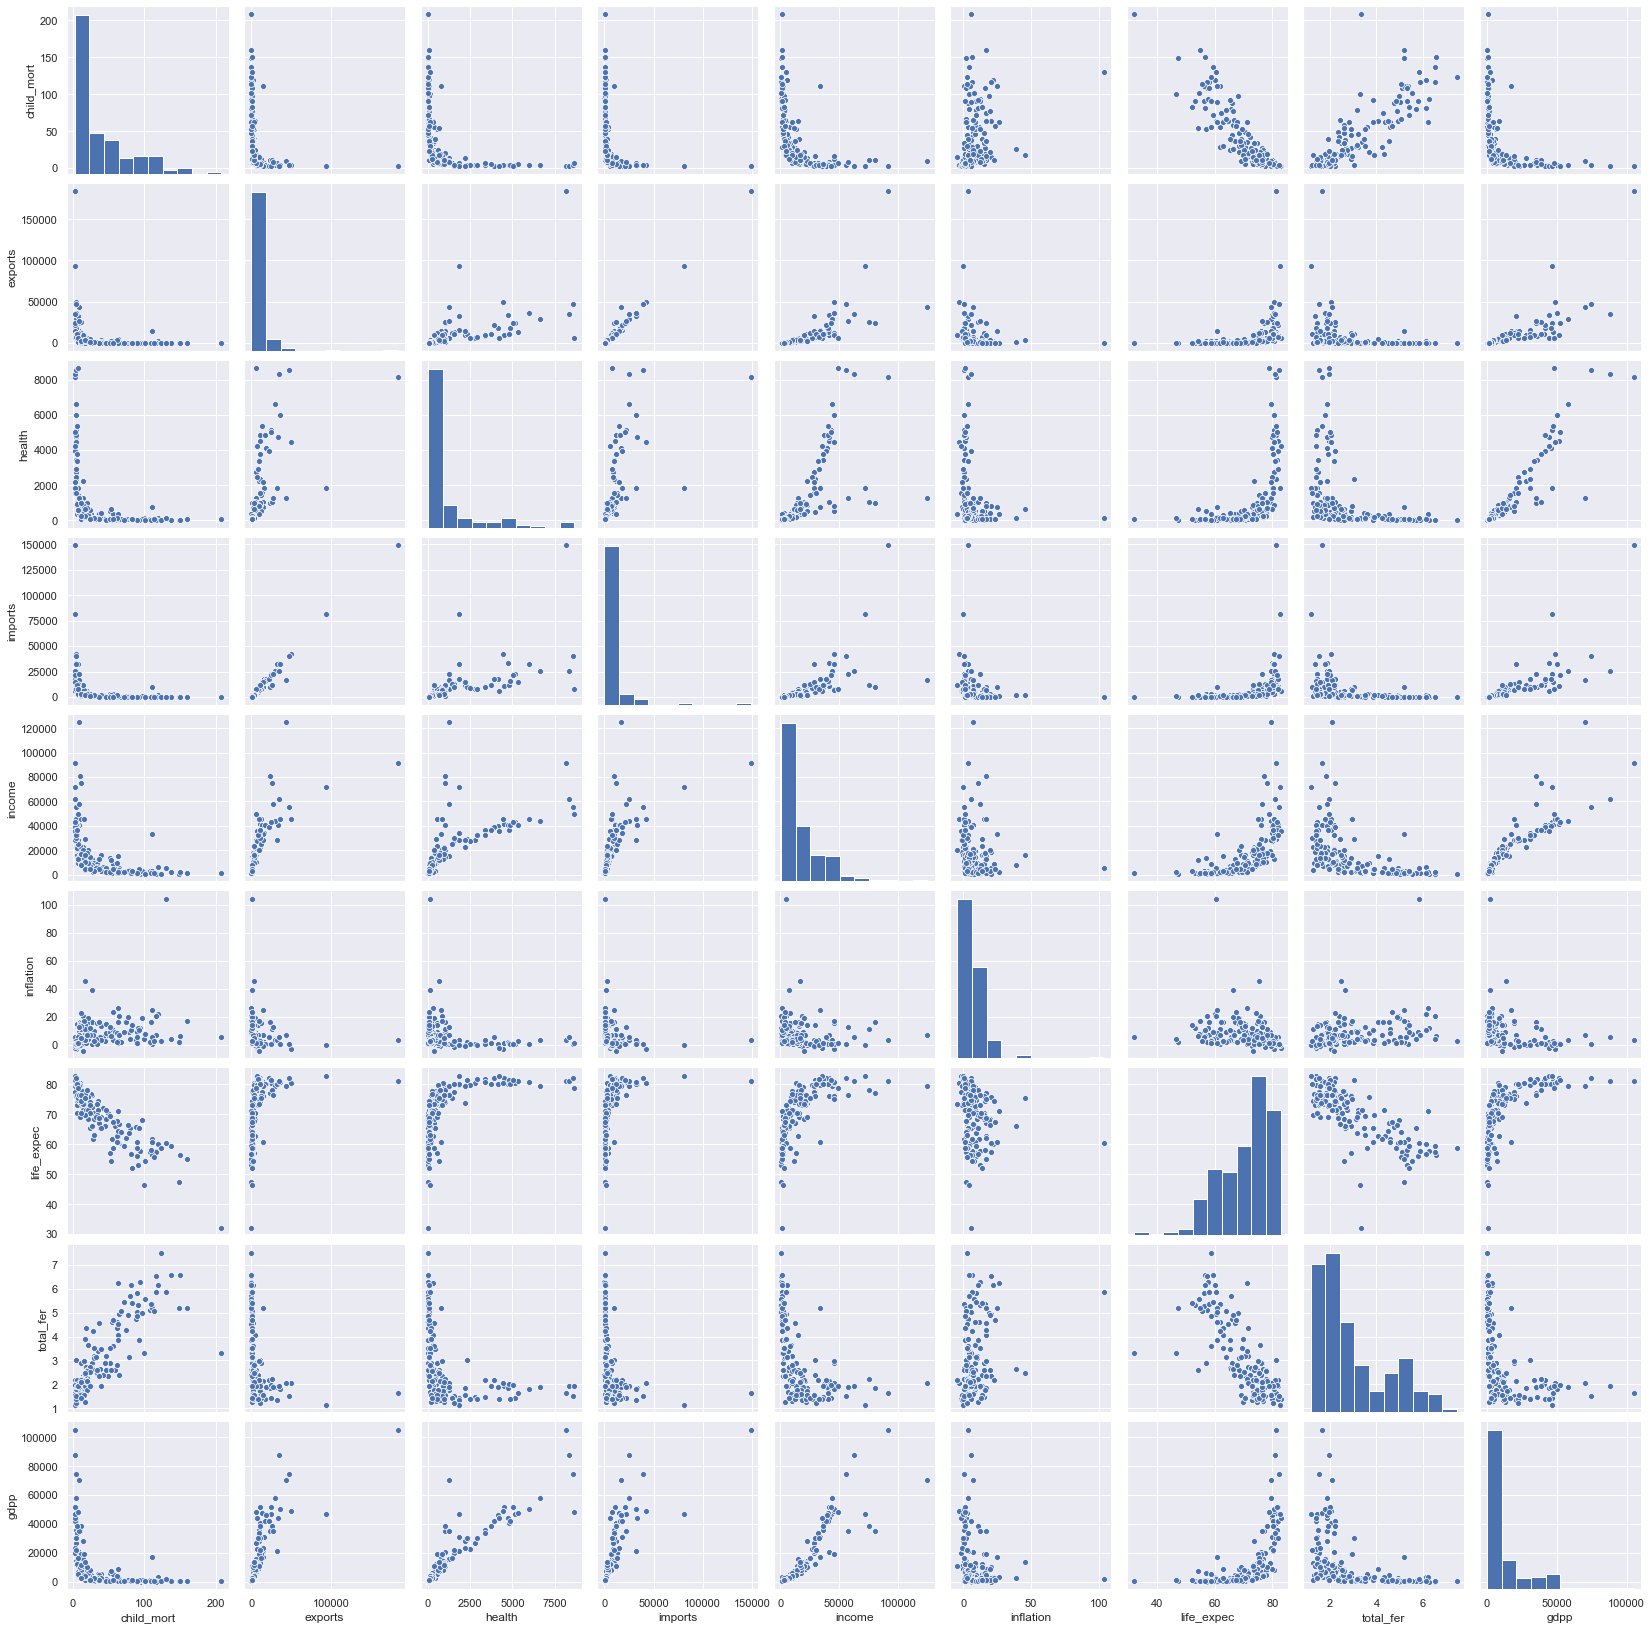

In [7]:
sns.set(style='darkgrid')

sns.pairplot(country_df, kind='scatter')

plt.show()

##### This is a lot to comprehend in one image, but one thing is certain,  there are a lot of correlations, we'll dive into some of these next!






- #### <font color=darkblue> Let's also check the Correlation Heatmap quickly!

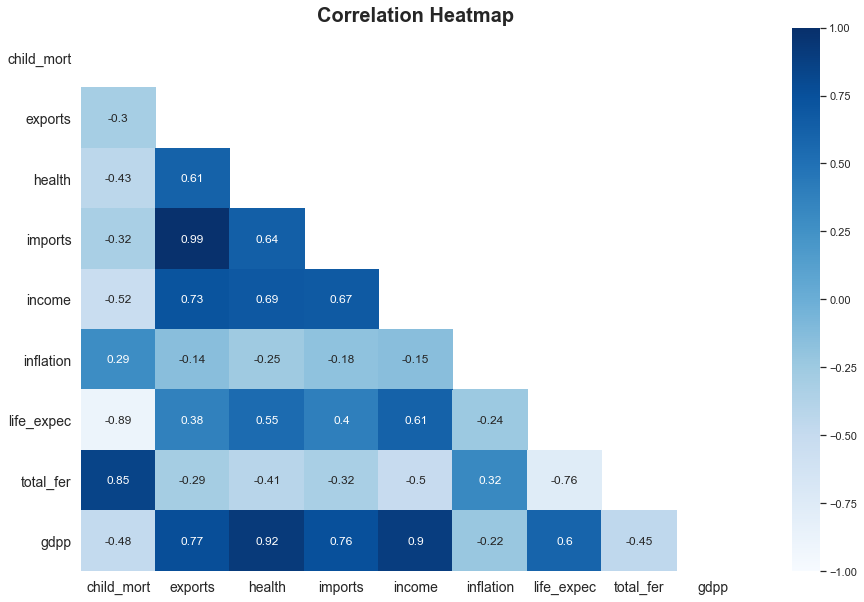

In [8]:
# Heatmap to understand the attributes dependency

sns.set_style('white')
plt.figure(figsize = (15,10))
matrix = np.triu(country_df.corr())
sns.heatmap(country_df.corr(), cmap='Blues',annot=True, mask=matrix, vmin=-1, vmax=1, center= 0)
#sns.heatmap(country_df.corr(),annot = True)
plt.yticks(rotation=0,fontsize=14)
plt.xticks(rotation=0,fontsize=14)
plt.title("Correlation Heatmap",fontweight="bold",fontsize=20)
plt.show()

##### <font color=darkblue> Inferences: 
- Imports and Exports are highly correlated (.99)
- GDPP is positively influenced by imports, exports & per person income.
- More GDPP translates as more spendings on health (0.92), which further means lesser child mortality rates, hence the negative correlation of -0.43. 
- More children per woman (higher the total fertility), more is the probablity of children deaths under 5 (more is the child mortality) 0.85 correlation.

    

### <font color=darkred>Univariate Analysis

In [9]:
# let's see the distributions
country_df.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,7420.618847,1056.733204,6588.352108,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,17973.885795,1801.408906,14710.810418,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,1.076920,12.821200,0.651092,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,447.140000,78.535500,640.215000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,1777.440000,321.886000,2045.580000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,7278.000000,976.940000,7719.600000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,183750.000000,8663.600000,149100.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


##### <font color=darkblue> Inferences: 
- Median Child deaths under 5 years of age per 1000 births stands at about 20.
- Median Inflation is about 5.4%.
- Median Life Expentancy is about 73 years.
- Median children/woman is about 2-3 children.

    

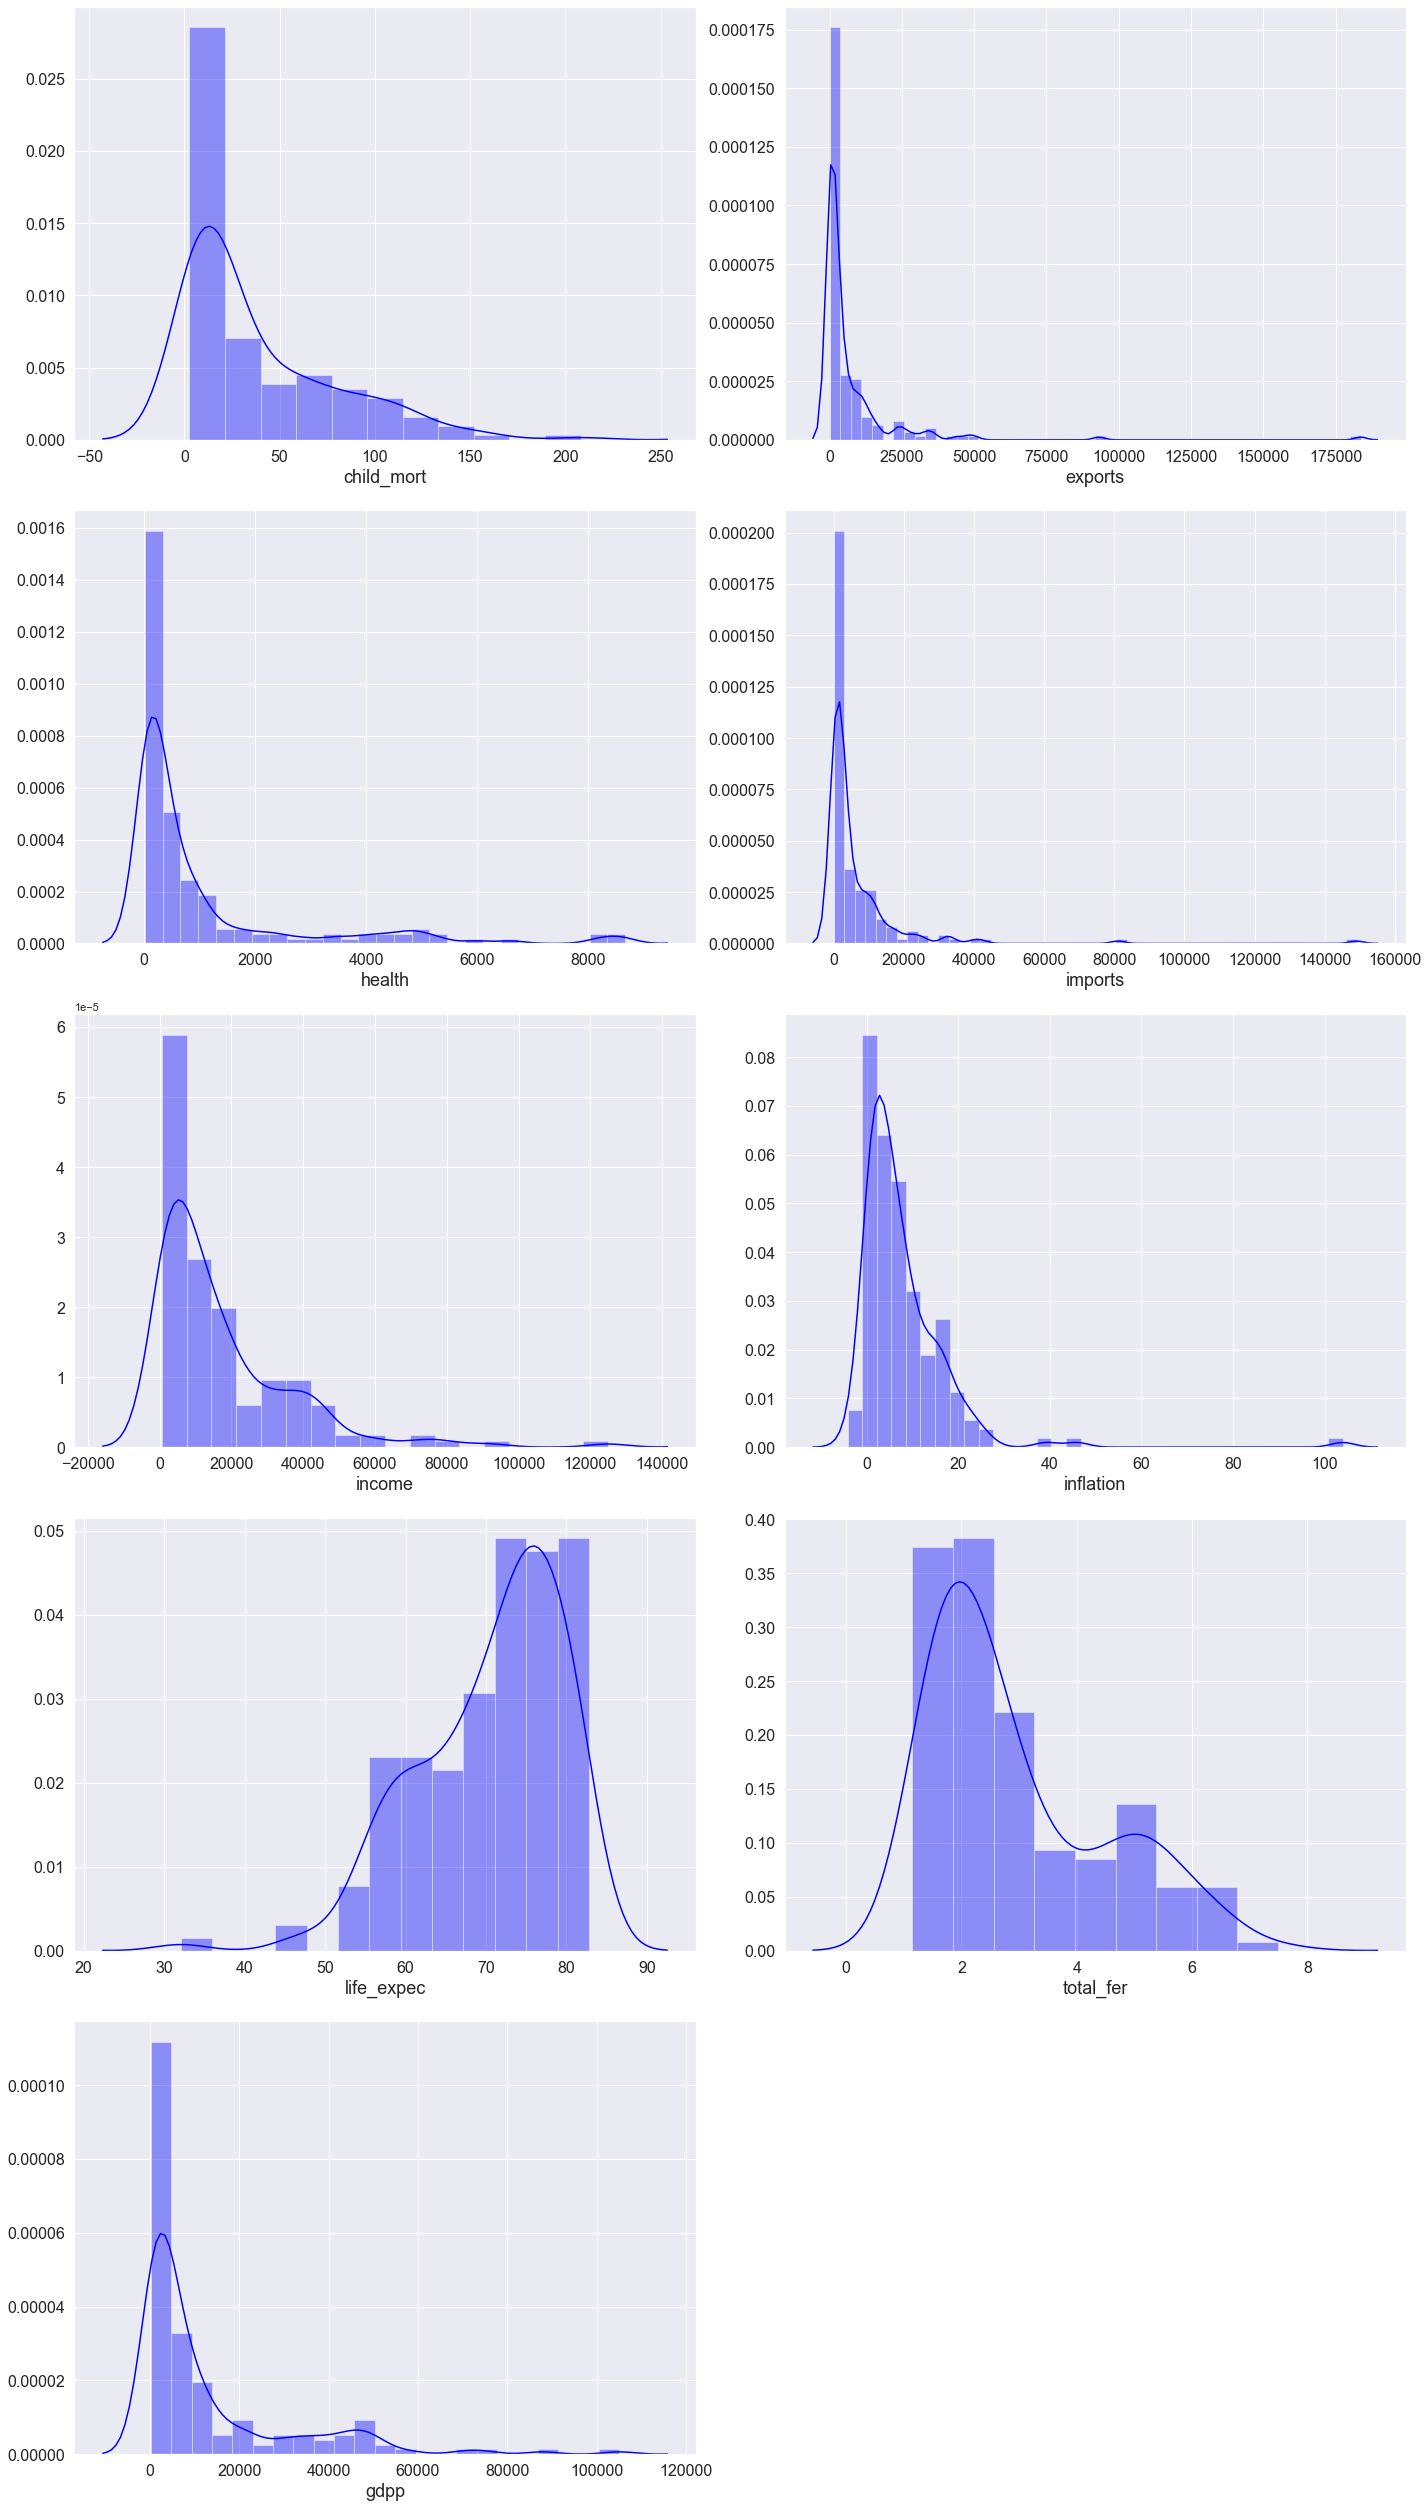

In [10]:
plt.figure(figsize = (20,35))
columns = country_df.columns[1:]
sns.set_style('darkgrid')
for i in enumerate(columns):
    plt.subplot(5,2, i[0]+1)
    sns.distplot(country_df[i[1]], color='blue')
    plt.yticks(rotation=0,fontsize=16)
    plt.xticks(rotation=0,fontsize=16)
    plt.xlabel(i[1],rotation=0,fontsize=18)
    plt.tight_layout() 

##### <font color=darkblue> Inferences: 
- Child Mortality, Income and GDPP can be considered for Cluster Profiling as they have some variation  

### <font color=darkred>Bivariate Analysis

- #### <font color=darkblue>Income vs Child Mortality



(array([-50.,   0.,  50., 100., 150., 200., 250.]),
 <a list of 7 Text major ticklabel objects>)

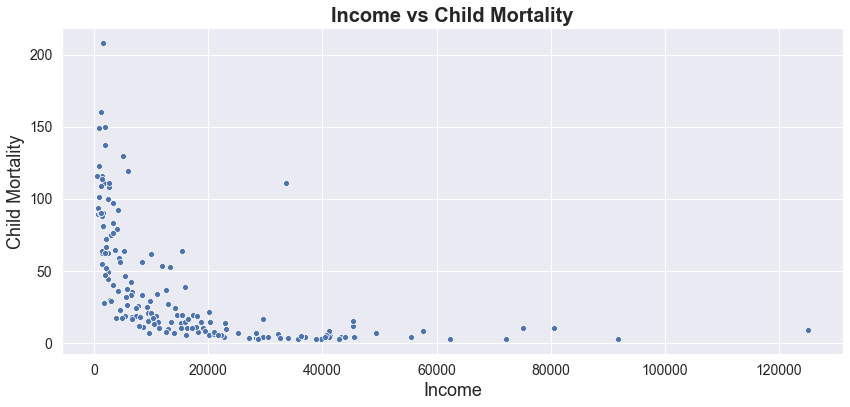

In [11]:
plt.figure(figsize=(14, 6))


sns.scatterplot(x='income',y='child_mort', data=country_df)
plt.title('Income vs Child Mortality',fontweight="bold", size=20)
plt.xlabel('Income', size=18)
plt.ylabel('Child Mortality', size=18)
plt.xticks(size=14)
plt.yticks(size=14)



##### <font color=darkblue> Inferences: 
- It can be seen that people with low income have high child mortality.
- As per person income increases, the mortality rates drop significantly, this trend is quite intuitive as more income usually translates as more sustainibility for a family.

- #### <font color=darkblue>Income vs Country


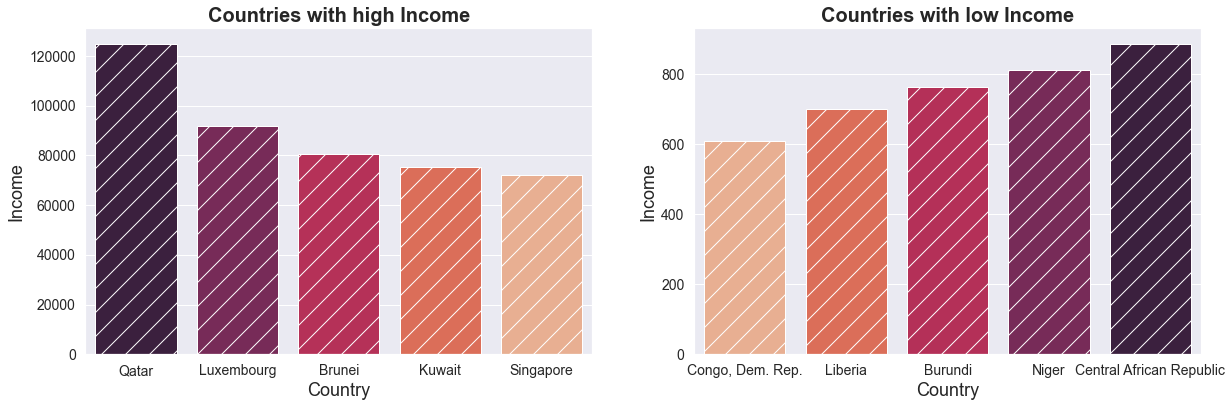

In [12]:
df_income= country_df.groupby('country').income.sum().sort_values(ascending=False)
df_income=pd.DataFrame(df_income)

df_income1=df_income.head()
df_income2=df_income.tail().sort_values('income',ascending=True)

sns.set_style('darkgrid')

plt.figure(figsize=(20, 6))
plt.subplot(1,2,1)

sns.barplot(df_income1.index, df_income1.income, palette='rocket',hatch='/')
plt.title('Countries with high Income',fontweight="bold", size=20)
plt.ylabel('Income', size=18)
plt.xlabel('Country', size=18)
plt.xticks(size=14)
plt.yticks(size=14)

plt.subplot(1,2,2)
sns.barplot(df_income2.index, df_income2.income, palette='rocket_r',hatch='/')
plt.title('Countries with low Income',fontweight="bold", size=20)
plt.ylabel('Income', size=18)
plt.xlabel('Country', size=18)
plt.xticks(size=14)
plt.yticks(size=14)
plt.show()

 
    
##### <font color=darkblue> Inferences: 
    
- Qatar has the highest income at 125000 per person.
- Congo, Democratic Republic and Liberia have the least per person income.  

- #### <font color=darkblue>Child Mortality vs Country 


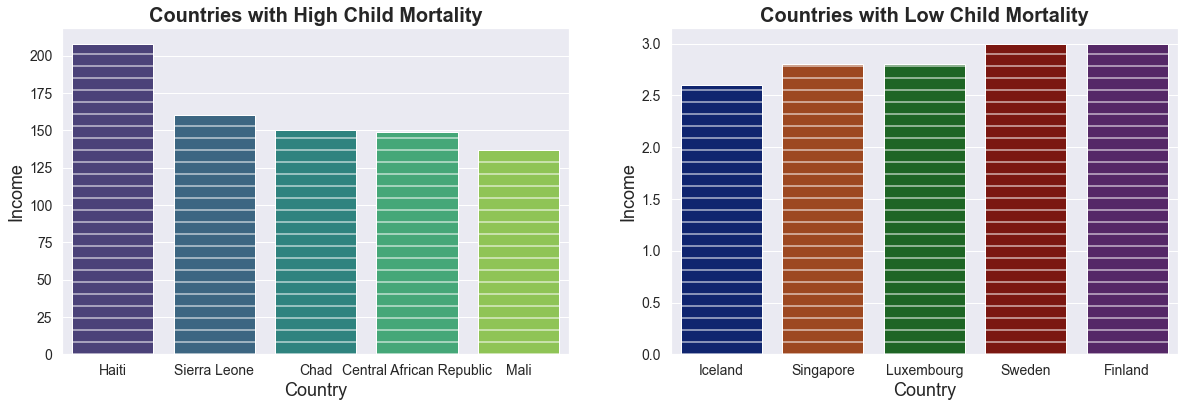

In [13]:
df_cm= country_df.groupby('country').child_mort.sum().sort_values(ascending=False)
df_cm=pd.DataFrame(df_cm)

df_cm1=df_cm.head()
df_cm2=df_cm.tail().sort_values('child_mort',ascending=True)

sns.set_style('darkgrid')

plt.figure(figsize=(20, 6))
plt.subplot(1,2,1)

sns.barplot(df_cm1.index, df_cm1.child_mort, palette='viridis',hatch='-')
plt.title('Countries with High Child Mortality',fontweight="bold", size=20)
plt.ylabel('Income', size=18)
plt.xlabel('Country', size=18)
plt.xticks(size=14)
plt.yticks(size=14)

plt.subplot(1,2,2)
sns.barplot(df_cm2.index, df_cm2.child_mort, palette='dark',hatch='-')
plt.title('Countries with Low Child Mortality',fontweight="bold", size=20)
plt.ylabel('Income', size=18)
plt.xlabel('Country', size=18)
plt.xticks(size=14)
plt.yticks(size=14)
plt.show()

 
    
##### <font color=darkblue> Inferences: 
    
- Haiti has the highest child mortality at 200+ deaths of less than 5 Y/Os per 1000 births.
- Singapore,Iceland and Luxembourg have the least child mortality.  

- #### <font color=darkblue>Health Expenses vs Country 


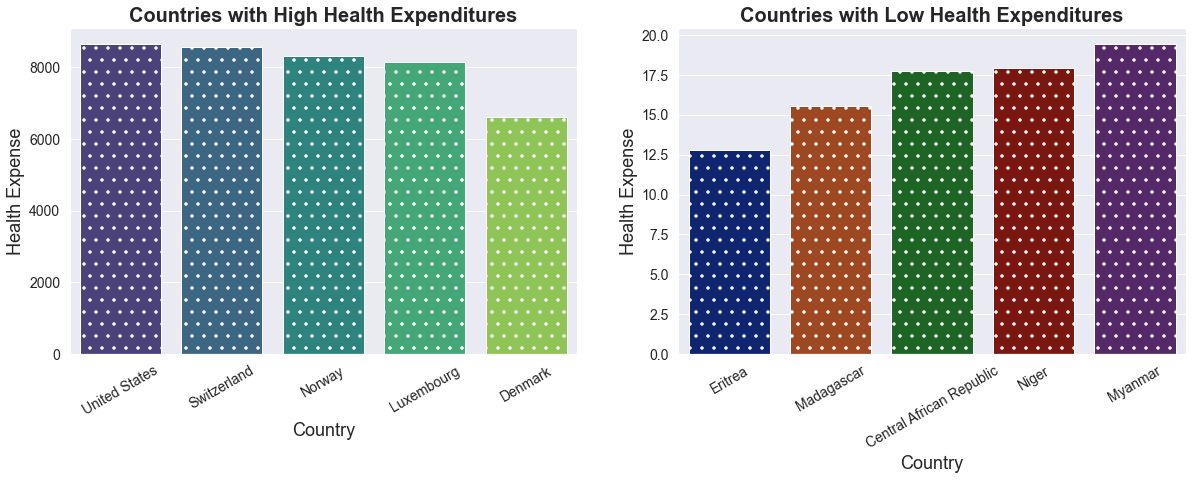

In [14]:
df_h= country_df.groupby('country').health.sum().sort_values(ascending=False)
df_h=pd.DataFrame(df_h)

df_h1=df_h.head()
df_h2=df_h.tail().sort_values('health',ascending=True)

sns.set_style('darkgrid')

plt.figure(figsize=(20, 6))
plt.subplot(1,2,1)

sns.barplot(df_h1.index, df_h1.health, palette='viridis',hatch='.')
plt.title('Countries with High Health Expenditures',fontweight="bold", size=20)
plt.ylabel('Health Expense', size=18)
plt.xlabel('Country', size=18)
plt.xticks(size=14, rotation=30)
plt.yticks(size=14)

plt.subplot(1,2,2)
sns.barplot(df_h2.index, df_h2.health, palette='dark',hatch='.')
plt.title('Countries with Low Health Expenditures',fontweight="bold", size=20)
plt.ylabel('Health Expense', size=18)
plt.xlabel('Country', size=18)
plt.xticks(size=14, rotation=30)
plt.yticks(size=14)
plt.show()

##### <font color=darkblue> Inferences: 
    
- Switzerland and US spend the most on health services.
- Eritria and Magagascar spend the least

- #### <font color=darkblue>Income vs Life Expentancy


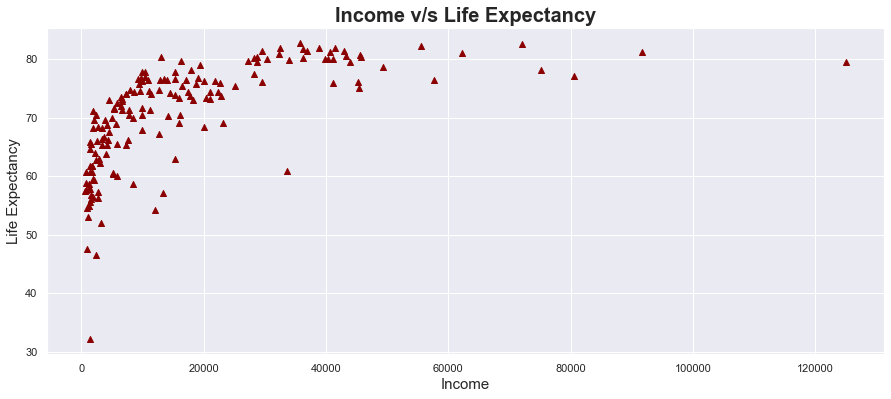

In [15]:
sns.set_style('darkgrid')

plt.figure(figsize=(15, 6))
plt.title('Income v/s Life Expectancy',fontweight="bold", size=20)
plt.xlabel('Income', size=15)
plt.ylabel('Life Expectancy', size=15)

plt.scatter(country_df.income,country_df.life_expec,color='darkred',marker='^')

##### <font color=darkblue> Inferences: 
    
- It can be clearly seen that with income, life expentancy also increases.

- #### <font color=darkblue>GDPP vs Health Expenses

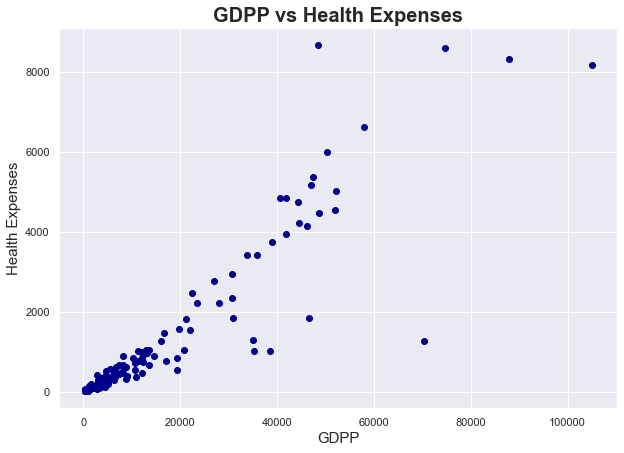

In [16]:
sns.set_style('darkgrid')

plt.figure(figsize=(10, 7))
plt.title('GDPP vs Health Expenses',fontweight="bold", size=20)
plt.xlabel('GDPP', size=15)
plt.ylabel('Health Expenses', size=15)

plt.scatter(country_df.gdpp,country_df.health,color='darkblue',marker='o')

##### <font color=darkblue> Inferences: 
    
- It can be seen that with expenditure on health services almost linearly increase with the GDPP.

- #### <font color=darkblue>Child Mortality vs Total Fertility

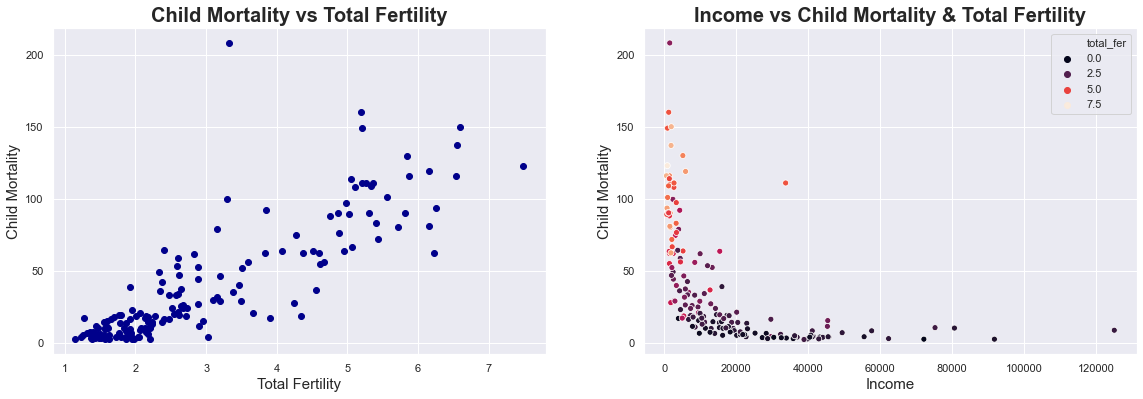

In [17]:
sns.set_style('darkgrid')

plt.figure(figsize=(14 ,6))
plt.subplot(1, 2, 1)
plt.title('Child Mortality vs Total Fertility', size=20,fontweight="bold")
plt.ylabel('Child Mortality', size=15)
plt.xlabel('Total Fertility', size=15)

plt.scatter(country_df.total_fer,country_df.child_mort,color='darkblue',marker='o')

plt.subplot(1, 2, 2)
sns.scatterplot(x='income',y='child_mort',hue='total_fer', data=country_df,palette='rocket')
plt.title('Income vs Child Mortality & Total Fertility',fontweight="bold", size=20)
plt.xlabel('Income', size=15)
plt.ylabel('Child Mortality', size=15)
plt.subplots_adjust(right=1.2)

##### <font color=darkblue> Inferences: 
    
- It can be seen that with expenditure on health services almost linearly increases with per capita GDP.
- In the 2nd plot we factor in Fertility as a coloring attribute, and it can be clearly seen that it is the lower income countries with are usually associated with higher fertilities

- #### <font color=darkblue>GDPP vs Life Expectency

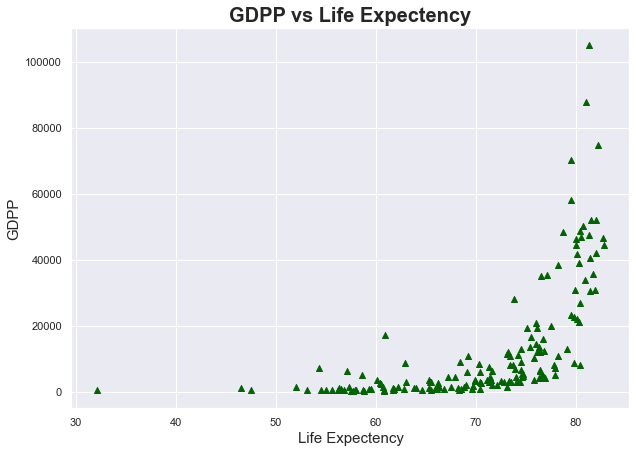

In [18]:
sns.set_style('darkgrid')

plt.figure(figsize=(10 ,7))
plt.title('GDPP vs Life Expectency', size=20,fontweight="bold")
plt.xlabel('Life Expectency', size=15)
plt.ylabel('GDPP', size=15)

plt.scatter(country_df.life_expec,country_df.gdpp,color='darkgreen',marker='^')
plt.show()

##### <font color=darkblue> Inferences: 
    
- It can be seen that life expectency is mostly 75+ for high GDPP countries and is in hte range 50-70 for low GDPP countries.

## <font color=darkred>Outlier Analysis</font>

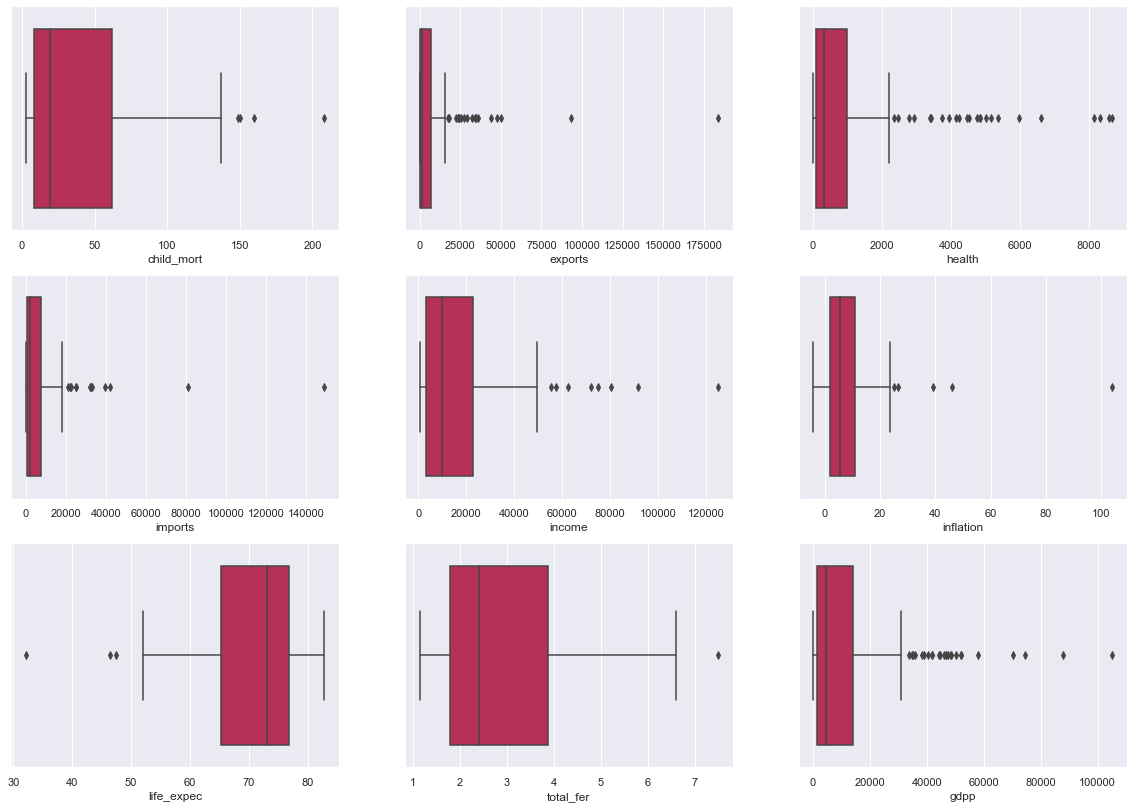

In [19]:
plt.figure(figsize = (20,14))
feature = country_df.columns[1:]
for i in enumerate(feature):
    plt.subplot(3,3, i[0]+1)
    sns.boxplot(country_df[i[1]],palette='rocket')

##### <font color=darkblue> Inferences: 
    
- It can be seen that with lots of outliers are present, these need to be treated as clustering is very sensitive to the presence of outliers in the data. 
- As this is a small dataset, we won't be dropping them, we shall do Outlier Capping / Thresholding.
- We shall follow Soft-Range Capping as we don't want to modify lots of values(1-99) i.e. all values above 99 percentile, will be capped at 99 percentile value.
- Countries in need will usually have Low life_expec, gdpp, imports, exports, income, health. Hence for these columns, higher values can be capped.
- Countries in need will usually have high inflation, child_mort and total_fer. Hence for these columns, lower values can be capped.

In [20]:
# before treatment
country_df.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,7420.618847,1056.733204,6588.352108,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,17973.885795,1801.408906,14710.810418,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,1.076920,12.821200,0.651092,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,447.140000,78.535500,640.215000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,1777.440000,321.886000,2045.580000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,7278.000000,976.940000,7719.600000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,183750.000000,8663.600000,149100.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


In [21]:
#Capping
upper_cap_cols=['life_expec', 'gdpp', 'imports', 'exports', 'income', 'health']
lower_cap_cols=['inflation', 'child_mort','total_fer']

for col in upper_cap_cols:
    q = country_df[col].quantile(0.99)
    country_df[col][country_df[col]>= q] = q
    
for col in lower_cap_cols:
    q = country_df[col].quantile(0.01)
    country_df[col][country_df[col]<= q] = q 

In [22]:
# after treatment
country_df.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.271257,6538.214776,1054.206622,5873.135222,16857.550898,7.798194,70.551138,2.948601,12756.826347
std,40.327869,11415.308590,1790.845342,9422.700869,17957.012855,10.553699,8.886987,1.513108,17430.208938
min,2.800000,1.076920,12.821200,0.651092,609.000000,-2.348800,32.100000,1.243200,231.000000
25%,8.250000,447.140000,78.535500,640.215000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,1777.440000,321.886000,2045.580000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,7278.000000,976.940000,7719.600000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,64794.260000,8410.330400,55371.390000,84374.000000,104.000000,82.370000,7.490000,79088.000000


<a id='modelling'></a>
## <font color=darkred>Clustering</font>

In [23]:
# import all libraries and dependencies for clustering
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree

### <font color=darkred>Hopkin's Statistic</font>


- #### <font color=darkblue>Is our data good for clustering? Do clusters really exist in our data? This is answered by The Hopkins statistic, it is a statistic which gives a value which indicates the cluster tendency, in other words: how well the data can be clustered.

In [24]:
# Check the hopkins

#Calculating the Hopkins statistic
from sklearn.neighbors import NearestNeighbors
from random import sample
from numpy.random import uniform
import numpy as np
from math import isnan
 
def hopkins(X):
    d = X.shape[1]
    #d = len(vars) # columns
    n = len(X) # rows
    m = int(0.1 * n) 
    nbrs = NearestNeighbors(n_neighbors=1).fit(X.values)
 
    rand_X = sample(range(0, n, 1), m)
 
    ujd = []
    wjd = []
    for j in range(0, m):
        u_dist, _ = nbrs.kneighbors(uniform(np.amin(X,axis=0),np.amax(X,axis=0),d).reshape(1, -1), 2, return_distance=True)
        ujd.append(u_dist[0][1])
        w_dist, _ = nbrs.kneighbors(X.iloc[rand_X[j]].values.reshape(1, -1), 2, return_distance=True)
        wjd.append(w_dist[0][1])
 
    H = sum(ujd) / (sum(ujd) + sum(wjd))
    if isnan(H):
        print(ujd, wjd)
        H = 0
 
    return H

- #### <font color=darkblue>The Hopkins statistic's value varies each time we run it as the comparison is done againt randomly scattered data, hence we will take the mean of 100 runs.

In [25]:
l= []
for i in range(100):
    l.append(hopkins(country_df.drop('country', axis = 1)))

sum(l)*100/len(l)

90.7690699678823

- #### <font color=darkblue> Any value upwards of 80% is indicates that the data is good for clustering.

## <font color=darkred>Scaling

- #### <font color=darkblue> Scaling affects clustering a lot, unscaled data means that the features won't be equally weighed, hence let's scale our features.

In [26]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
country_df_scaled = scaler.fit_transform(country_df.drop('country', axis = 1))
country_df_scaled

array([[ 1.29153663, -0.56962212, -0.56695778, ..., -1.61970522,
         1.90339023, -0.70225949],
       [-0.53899289, -0.47385792, -0.4403934 , ...,  0.64883094,
        -0.86081558, -0.49872564],
       [-0.27286971, -0.42399973, -0.48627082, ...,  0.67140344,
        -0.03884551, -0.47743428],
       ...,
       [-0.37235501, -0.49160668, -0.54024972, ...,  0.28767096,
        -0.66195186, -0.65869853],
       [ 0.44839871, -0.53995007, -0.55242911, ..., -0.34435902,
         1.14107928, -0.65869853],
       [ 1.11495022, -0.52701632, -0.54227159, ..., -2.09372771,
         1.62498101, -0.6500669 ]])

In [27]:
country_df_scaled = pd.DataFrame(country_df_scaled, columns = country_df.columns[1:])
country_df_scaled.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,1.291537,-0.569622,-0.566958,-0.598741,-0.851668,0.156035,-1.619705,1.903390,-0.702259
1,-0.538993,-0.473858,-0.440393,-0.413584,-0.386946,-0.314406,0.648831,-0.860816,-0.498726
2,-0.272870,-0.424000,-0.486271,-0.476100,-0.221053,0.788991,0.671403,-0.038846,-0.477434
3,2.007831,-0.381249,-0.534088,-0.463973,-0.612045,1.387733,-1.179541,2.128769,-0.530950
4,-0.695682,-0.086742,-0.178410,0.139728,0.125254,-0.604273,0.705262,-0.542634,-0.032042


<a id='kmeans'></a>
## <font color=darkred>K-Means Clustering

- #### <font color=darkblue>We first need to decide on the number of clusters, to do this we will use two methods:
    1. Silhouette Score  
    2. Elbow Curve - SSD

- ### <font color=darkblue>Silhouette Score :
$$\text{silhouette score}=\frac{p-q}{max(p,q)}$$

$p$ is the mean distance to the points in the nearest cluster that the data point is not a part of

$q$ is the mean intra-cluster distance to all the points in its own cluster.

* The value of the silhouette score range lies between -1 to 1. 

* A score closer to 1 indicates that the data point is very similar to other data points in the cluster, 

* A score closer to -1 indicates that the data point is not similar to the data points in its cluster.

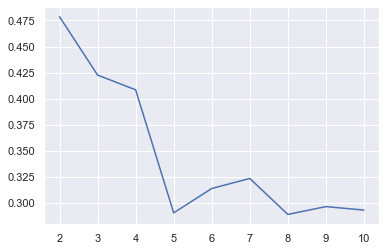

In [28]:
# Choose the value of K
# Silhouette score
# Elbow curve-ssd

from sklearn.metrics import silhouette_score
ss = []
for k in range(2, 11):
    kmean = KMeans(n_clusters = k).fit(country_df_scaled)
    ss.append([k, silhouette_score(country_df_scaled, kmean.labels_)])
temp = pd.DataFrame(ss)    
plt.plot(temp[0], temp[1])

plt.show()

- #### <font color=darkblue>Max Score is at k=2, but usually we don't consider 2 clusters only, hence we will go with next highest : k=3.


- ### <font color=darkblue>Elbow Curve :

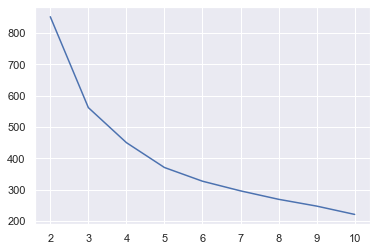

In [29]:
ssd = []
for k in range(2, 11):
    kmean = KMeans(n_clusters = k).fit(country_df_scaled)
    ssd.append([k, kmean.inertia_])
    
temp = pd.DataFrame(ssd)
plt.plot(temp[0], temp[1])
plt.show()

- #### <font color=darkblue>Elbow at k=3 and another at k=5, we shall go with the lower k-value for better interpretibility.

#### <font color=darkblue>- Building KMeans model with k=3.

In [30]:
# K=3
# Final Kmean Clustering

kmean = KMeans(n_clusters = 3, random_state = 42)
kmean.fit(country_df_scaled)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=42, tol=0.0001, verbose=0)

- ##### uses Kmeans++ initialization technique

In [31]:
country_df_kmean = country_df.copy()

#### <font color=darkblue>- Attaching KMeans predicted labels.

In [32]:
labels  = pd.DataFrame(kmean.labels_, columns= ['label'])
country_df_kmean = pd.concat([country_df_kmean, labels], axis =1)
country_df_kmean.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,label
0,Afghanistan,90.2,55.30,41.9174,248.297,1610.0,9.44,56.2,5.82,553.0,1
1,Albania,16.6,1145.20,267.8950,1987.740,9930.0,4.49,76.3,1.65,4090.0,0
2,Algeria,27.3,1712.64,185.9820,1400.440,12900.0,16.10,76.5,2.89,4460.0,0
3,Angola,119.0,2199.19,100.6050,1514.370,5900.0,22.40,60.1,6.16,3530.0,1
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100.0,1.44,76.8,2.13,12200.0,0


In [33]:
country_df_kmean.label.value_counts()

0    92
1    48
2    27
Name: label, dtype: int64

- ### <font color=darkred>Visualizing the clusters generated by KMeans.

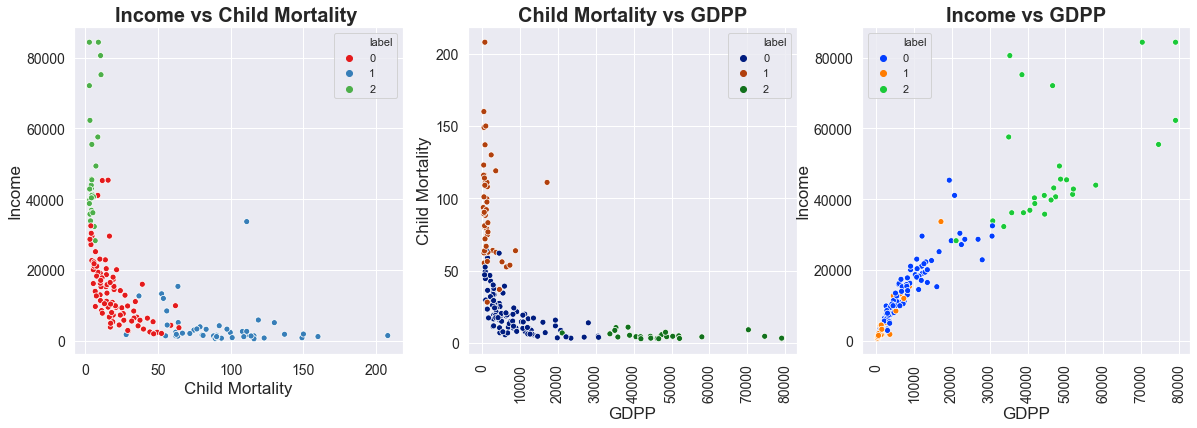

In [34]:
sns.set_style("darkgrid")

fig, axes = plt.subplots(1,3, figsize=(20,6))
plt.subplot(1,3,1)
sns.scatterplot(x='child_mort', y='income', hue='label',data=country_df_kmean, palette='Set1')
plt.title('Income vs Child Mortality ',fontweight="bold", size=20)
plt.xlabel('Child Mortality', size=17)
plt.ylabel('Income', size=17)
plt.yticks(size=14)
plt.xticks(size=14)

plt.subplot(1,3,2)
sns.scatterplot(y='child_mort', x='gdpp', hue='label',data=country_df_kmean, palette='dark')
plt.title('Child Mortality vs GDPP',fontweight="bold", size=20)
plt.xlabel('GDPP', size=17)
plt.ylabel('Child Mortality', size=17)
plt.yticks(size=14)
plt.xticks(size=14,rotation=90)

plt.subplot(1,3,3)
sns.scatterplot(x='gdpp', y='income', hue='label',data=country_df_kmean, palette='bright')
plt.title('Income vs GDPP',fontweight="bold", size=20)
plt.xlabel('GDPP', size=17)
plt.ylabel('Income', size=17)
plt.yticks(size=14)
plt.xticks(size=14,rotation=90)

#plt.tight_layout()
plt.show()

- ##### Clearly visible clusters

- ### <font color=darkred>Cluster Profiling - KMeans.
    
    - ##### Based on Child Mortality, Income and GDPP

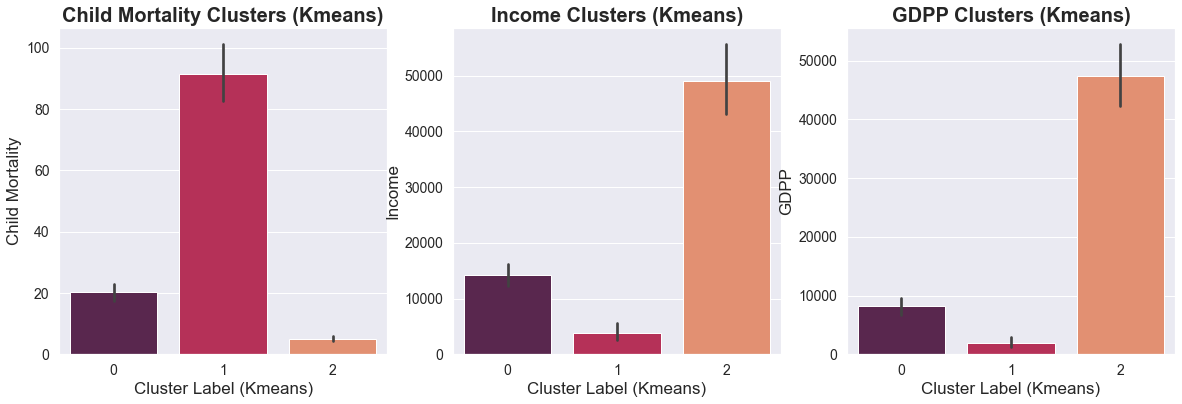

In [35]:
# plots
fig, axes = plt.subplots(1,3, figsize=(20,6))

plt.subplot(1,3,1)

sns.barplot(x='label', y='child_mort', data=country_df_kmean,palette='rocket')
plt.title('Child Mortality Clusters (Kmeans)',fontweight="bold", size=20)
plt.xlabel('Cluster Label (Kmeans)', size=17)
plt.ylabel('Child Mortality', size=17)
plt.yticks(size=14)
plt.xticks(size=14)

plt.subplot(1,3,2)

sns.barplot(x='label', y='income', data=country_df_kmean, palette='rocket')
plt.title('Income Clusters (Kmeans)',fontweight="bold", size=20)
plt.xlabel('Cluster Label (Kmeans)', size=17)
plt.ylabel('Income', size=17)
plt.yticks(size=14)
plt.xticks(size=14)

plt.subplot(1,3,3)

sns.barplot(x='label', y='gdpp', data=country_df_kmean, palette='rocket')
plt.title('GDPP Clusters (Kmeans)',fontweight="bold", size=20)
plt.xlabel('Cluster Label (Kmeans)', size=17)
plt.ylabel('GDPP', size=17)
plt.yticks(size=14)
plt.xticks(size=14)

#plt.tight_layout()
plt.show()


##### <font color=darkblue> Inferences: 
    
- From the above plots, it can be seen that:
    - Cluster 0 has Medium Child Mortality, Income and GDPP.
    - Cluster 1 has High Child Mortality, Low Income and Low GDPP.
    - Cluster 2 has Low Child Mortality, High Income and High GDPP.

<b>Hence countries in Cluster 1 are in direst need of aid, let's dive into Cluster 1. 

In [36]:
aid_countries_kmeans=country_df_kmean[country_df_kmean['label'] == 1]
print("This isn't the final list and will be filtered later.");

aid_countries_kmeans[['country']]

This isn't the final list and will be filtered later.


,country
0,Afghanistan
3,Angola
17,Benin
21,Botswana
25,Burkina Faso
26,Burundi
28,Cameroon
31,Central African Republic
32,Chad
36,Comoros


### We will finalise the country list once we are done with hierarchical clustering, now let's jump into that !

<a id='hc'></a>
## <font color=darkred>Hierarchical Clustering

- ### <font color=darkblue>Single Linkage:

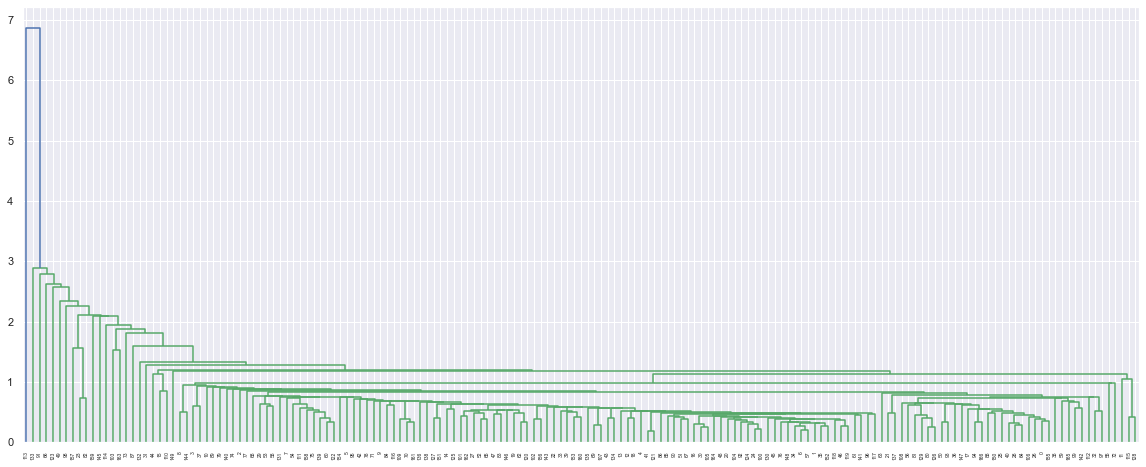

In [37]:
plt.figure(figsize = (20,8))
mergings = linkage(country_df_scaled, method="single", metric='euclidean')
dendrogram(mergings)
plt.show()

##### <font color=darkblue>Inferences:
 - It can be seen that Single Linkage doesn't produce a good result for cluster analysis. Hence, we go ahead with the Complete Linkage method.

- ### <font color=darkblue>Complete Linkage:

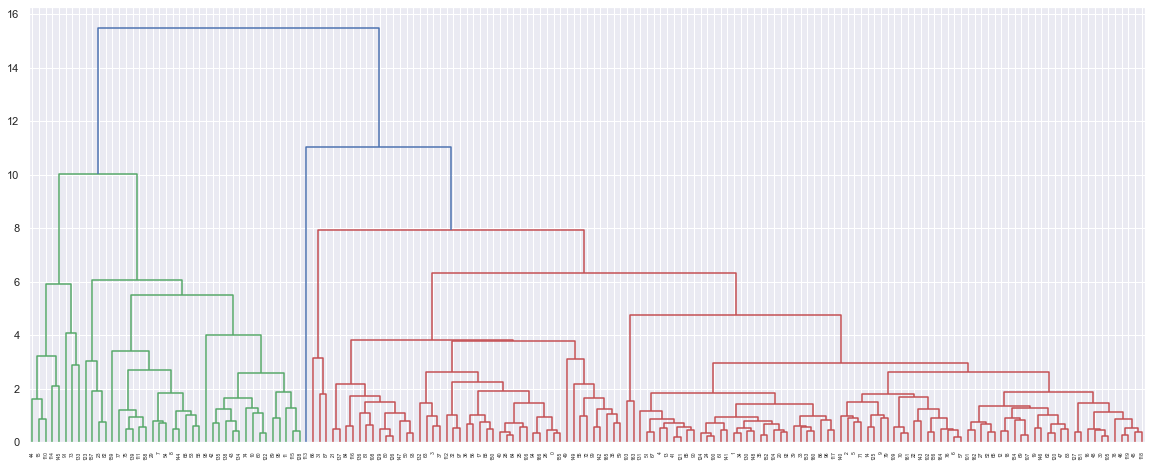

In [38]:
# complete linkage
plt.figure(figsize = (20,8))
mergings = linkage(country_df_scaled, method="complete", metric='euclidean')
dendrogram(mergings)
plt.show()

##### <font color=darkblue>Inferences:
 - The results are much better than Single Linkage, but <b>if we select k=3 (same as what we did for KMeans), there is one cluster which has ONLY ONE COUNTRY in it, Hence we won't take k=3 here, we will take k=2. (Threshold at 12)

#### <font color=darkblue>- Building HC model with k=2.

In [39]:
# 3 clusters
cluster_labels = cut_tree(mergings, n_clusters=2).reshape(-1, )
cluster_labels

array([0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0])

#### <font color=darkblue>- Attaching HC predicted labels.

In [40]:
# assign cluster labels
country_df['cluster_labels'] = cluster_labels
country_df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_labels
0,Afghanistan,90.2,55.30,41.9174,248.297,1610.0,9.44,56.2,5.82,553.0,0
1,Albania,16.6,1145.20,267.8950,1987.740,9930.0,4.49,76.3,1.65,4090.0,0
2,Algeria,27.3,1712.64,185.9820,1400.440,12900.0,16.10,76.5,2.89,4460.0,0
3,Angola,119.0,2199.19,100.6050,1514.370,5900.0,22.40,60.1,6.16,3530.0,0
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100.0,1.44,76.8,2.13,12200.0,0


In [41]:
country_df.cluster_labels.value_counts()

0    126
1    41 
Name: cluster_labels, dtype: int64

- ### <font color=darkred>Visualizing the clusters generated by Hierarchical Clustering.

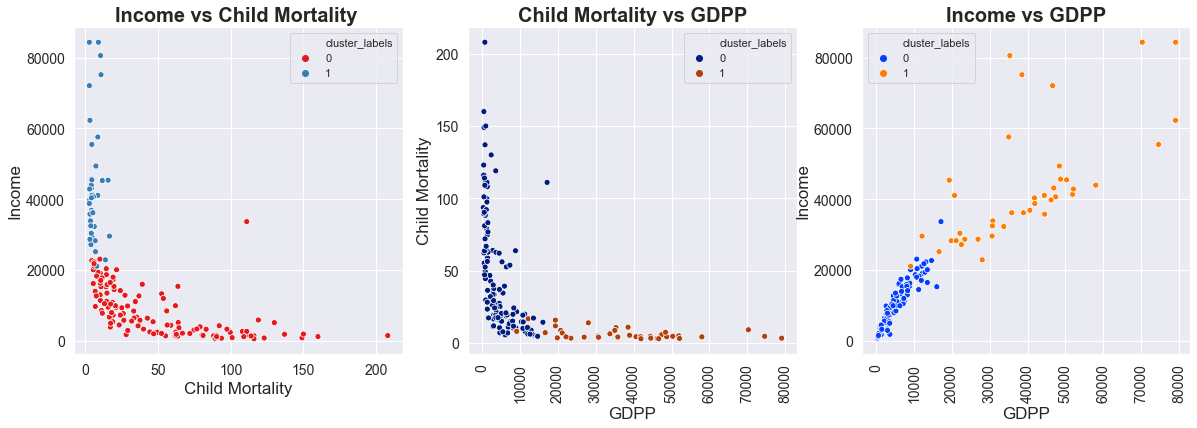

In [42]:
sns.set_style("darkgrid")

fig, axes = plt.subplots(1,3, figsize=(20,6))
plt.subplot(1,3,1)
sns.scatterplot(x='child_mort', y='income', hue='cluster_labels',data=country_df, palette='Set1')
plt.title('Income vs Child Mortality ',fontweight="bold", size=20)
plt.xlabel('Child Mortality', size=17)
plt.ylabel('Income', size=17)
plt.yticks(size=14)
plt.xticks(size=14)

plt.subplot(1,3,2)
sns.scatterplot(y='child_mort', x='gdpp', hue='cluster_labels',data=country_df, palette='dark')
plt.title('Child Mortality vs GDPP',fontweight="bold", size=20)
plt.xlabel('GDPP', size=17)
plt.ylabel('Child Mortality', size=17)
plt.yticks(size=14)
plt.xticks(size=14,rotation=90)

plt.subplot(1,3,3)
sns.scatterplot(x='gdpp', y='income',hue='cluster_labels',data=country_df, palette='bright')
plt.title('Income vs GDPP',fontweight="bold", size=20)
plt.xlabel('GDPP', size=17)
plt.ylabel('Income', size=17)
plt.yticks(size=14)
plt.xticks(size=14,rotation=90)

#plt.tight_layout()
plt.show()

- ##### Clusters formed in KMeans were much better than HC.

- ### <font color=darkred>Cluster Profiling - Hierarchical.
    
    - ##### Based on Child Mortality, Income and GDPP

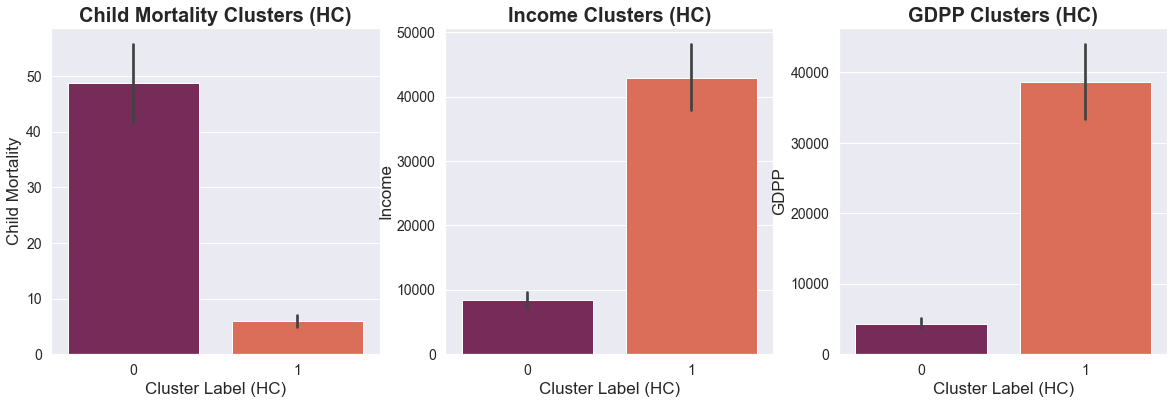

In [43]:
# plots
fig, axes = plt.subplots(1,3, figsize=(20,6))

plt.subplot(1,3,1)

sns.barplot(x='cluster_labels', y='child_mort', data=country_df,palette='rocket')
plt.title('Child Mortality Clusters (HC)',fontweight="bold", size=20)
plt.xlabel('Cluster Label (HC)', size=17)
plt.ylabel('Child Mortality', size=17)
plt.yticks(size=14)
plt.xticks(size=14)

plt.subplot(1,3,2)

sns.barplot(x='cluster_labels', y='income', data=country_df, palette='rocket')
plt.title('Income Clusters (HC)',fontweight="bold", size=20)
plt.xlabel('Cluster Label (HC)', size=17)
plt.ylabel('Income', size=17)
plt.yticks(size=14)
plt.xticks(size=14)

plt.subplot(1,3,3)

sns.barplot(x='cluster_labels', y='gdpp', data=country_df, palette='rocket')
plt.title('GDPP Clusters (HC)',fontweight="bold", size=20)
plt.xlabel('Cluster Label (HC)', size=17)
plt.ylabel('GDPP', size=17)
plt.yticks(size=14)
plt.xticks(size=14)

#plt.tight_layout()
plt.show()



##### <font color=darkblue> Inferences: 
    
- From the above plots, it can be seen that:
    - Cluster 0 has High Child Mortality, Low Income and Low GDPP.
    - Cluster 1 has Low Child Mortality, High Income and High GDPP.

<b>Hence countries in Cluster 0 are in direst need of aid, let's dive into Cluster 0. 

In [44]:
aid_countries_hc=country_df[country_df['cluster_labels'] == 0]
print("This isn't the final list and will be filtered later.");
aid_countries_hc[['country']]

This isn't the final list and will be filtered later.


,country
0,Afghanistan
1,Albania
2,Algeria
3,Angola
4,Antigua and Barbuda
...,...
162,Vanuatu
163,Venezuela
164,Vietnam
165,Yemen


### We will now analyse both the results (KMeans and HC) and come up with a final list.

<a id='fa'></a>
## <font color=darkred>FINAL ANALYSIS


-  #### <font color=darkblue> First of all, we will take the intersection of countries in both the lists (KMeans and HC) 

In [45]:
aid_countries_final = pd.merge(aid_countries_hc, aid_countries_kmeans, how ='inner') 

In [46]:
aid_countries_final

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_labels,label
0,Afghanistan,90.2,55.3000,41.9174,248.297,1610.0,9.440,56.2,5.82,553.0,0,1
1,Angola,119.0,2199.1900,100.6050,1514.370,5900.0,22.400,60.1,6.16,3530.0,0,1
2,Benin,111.0,180.4040,31.0780,281.976,1820.0,0.885,61.8,5.36,758.0,0,1
3,Botswana,52.5,2768.6000,527.0500,3257.550,13300.0,8.920,57.1,2.88,6350.0,0,1
4,Burkina Faso,116.0,110.4000,38.7550,170.200,1430.0,6.810,57.9,5.87,575.0,0,1
5,Burundi,93.6,20.6052,26.7960,90.552,764.0,12.300,57.7,6.26,231.0,0,1
6,Cameroon,108.0,290.8200,67.2030,353.700,2660.0,1.910,57.3,5.11,1310.0,0,1
7,Central African Republic,149.0,52.6280,17.7508,118.190,888.0,2.010,47.5,5.21,446.0,0,1
8,Chad,150.0,330.0960,40.6341,390.195,1930.0,6.390,56.5,6.59,897.0,0,1
9,Comoros,88.2,126.8850,34.6819,397.573,1410.0,3.870,65.9,4.75,769.0,0,1


-  #### <font color=darkblue> We have 47 countries to choose from. 

### <font color=darkred>Analysis Metric

### <font color=darkblue> We shall now define a metric for analysis. We shall call this metric 'Neediness Score '.
- #### 'Neediness' of a country is directly proportional to Child Mortality, and inversely proportional to GDPP and Income.

#### $$\text{Neediness Score}=\frac{ChildMortality}{GDPP*Income}*(10^6) $$
 #### $$10^6 \text{ is added to make this value comprehensible.}\$$
- #### <font color=darkred>Note: The absolute value of this metric carries no meaning, all we are interested in, is the RELATIVE VALUE of this metric.

In [47]:
aid_countries_final['Neediness_score'] = round((aid_countries_final.child_mort)*(10**6)/((aid_countries_final.income)*(aid_countries_final.gdpp)),1)

In [48]:
aid_countries_final.sort_values(by=['Neediness_score'],ascending=False,inplace=True)

In [49]:
aid_countries_final[['country','child_mort','income','gdpp','Neediness_score']]

,country,child_mort,income,gdpp,Neediness_score
10,"Congo, Dem. Rep.",116.0,609.0,334.0,570.3
5,Burundi,93.6,764.0,231.0,530.4
33,Niger,123.0,814.0,348.0,434.2
26,Liberia,89.3,700.0,327.0,390.1
7,Central African Republic,149.0,888.0,446.0,376.2
38,Sierra Leone,160.0,1220.0,399.0,328.7
31,Mozambique,101.0,918.0,419.0,262.6
20,Haiti,208.0,1500.0,662.0,209.5
28,Malawi,90.5,1030.0,459.0,191.4
44,Togo,90.3,1210.0,488.0,152.9


## <font color=darkred> The Final List of Top 10 Countries in direst need of aid

In [50]:
aid_countries_final.reset_index(inplace=True)
aid_countries_final.index = aid_countries_final.index+1
aid_countries_final[['country']].head(10)

,country
1,"Congo, Dem. Rep."
2,Burundi
3,Niger
4,Liberia
5,Central African Republic
6,Sierra Leone
7,Mozambique
8,Haiti
9,Malawi
10,Togo


## <font color=darkred> Final Recommendation to CEO: 
### As listed above, these African countries have very low incomes and very high child mortalities, they are in urgent need of aid and should be considered as first priority to be helped.
